In [30]:
#import the necessary libraries for plotting
import numpy as np
import matplotlib.pyplot as plt
import csv



## Exercise 2 Sampling via transformation of coordinates

#### 2.1 Sampling uniformly from a unit disk
The naive approach from the exercise does not produce the desired uniform dstribution of points across the disk, as the area grows with the square of the radius, the middle of the circle is oversampled. The right coordinate transform of the uniform distribution was carried out by hand in exercise2_handwritten.pdf, and implemented in exercise2.c, and the result of both approaches are plotted below. The proper coordinate transform leads to a nice uniform sampling.

In [31]:
data3=[]
with open('data3.csv') as csvfile:
    contents = csv.reader(csvfile, delimiter=";")
    next(contents)
    for row in contents:
    
        data3.append(np.asarray(row).astype('float64'))
        


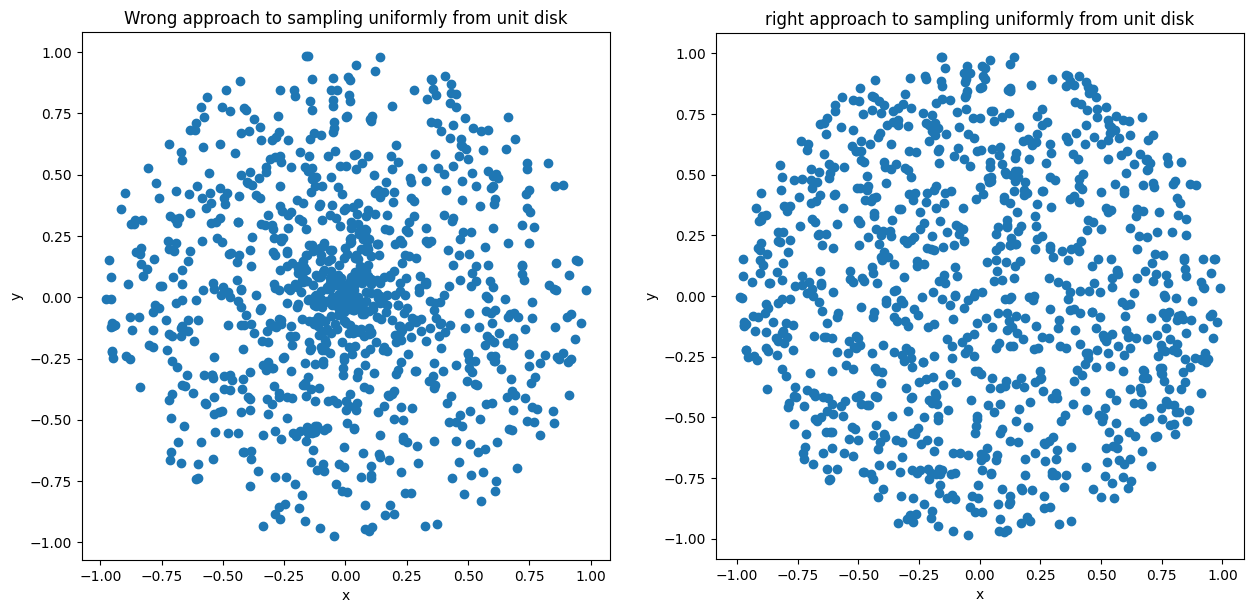

In [32]:

wrong_sampling_unit_disk_x= data3[0]
wrong_sampling_unit_disk_y= data3[1]

right_sampling_unit_disk_x= data3[2]
right_sampling_unit_disk_y= data3[3]

fig, axs = plt.subplots(1,2, figsize=(15,7.5))
axs[0].set_title("Wrong approach to sampling uniformly from unit disk")
axs[0].scatter(wrong_sampling_unit_disk_x,wrong_sampling_unit_disk_y)
axs[0].set_aspect("equal")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")

axs[1].set_title("right approach to sampling uniformly from unit disk")
axs[1].scatter(right_sampling_unit_disk_x,right_sampling_unit_disk_y)
axs[1].set_aspect("equal")
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")

plt.show()



#### 2.2 Box Muller Transform

Using a coordinate Transform to spherical coordinates followed by the inversion method (see  handwritten notes) points were generated  first from a standard bivariate distribution.  I understood the next part of the exercise to mean that this should be extended to a bivariate Gaussian without correlation. The necessary transform is  also derived in the handwritten notes. This sampling was then used to generate 

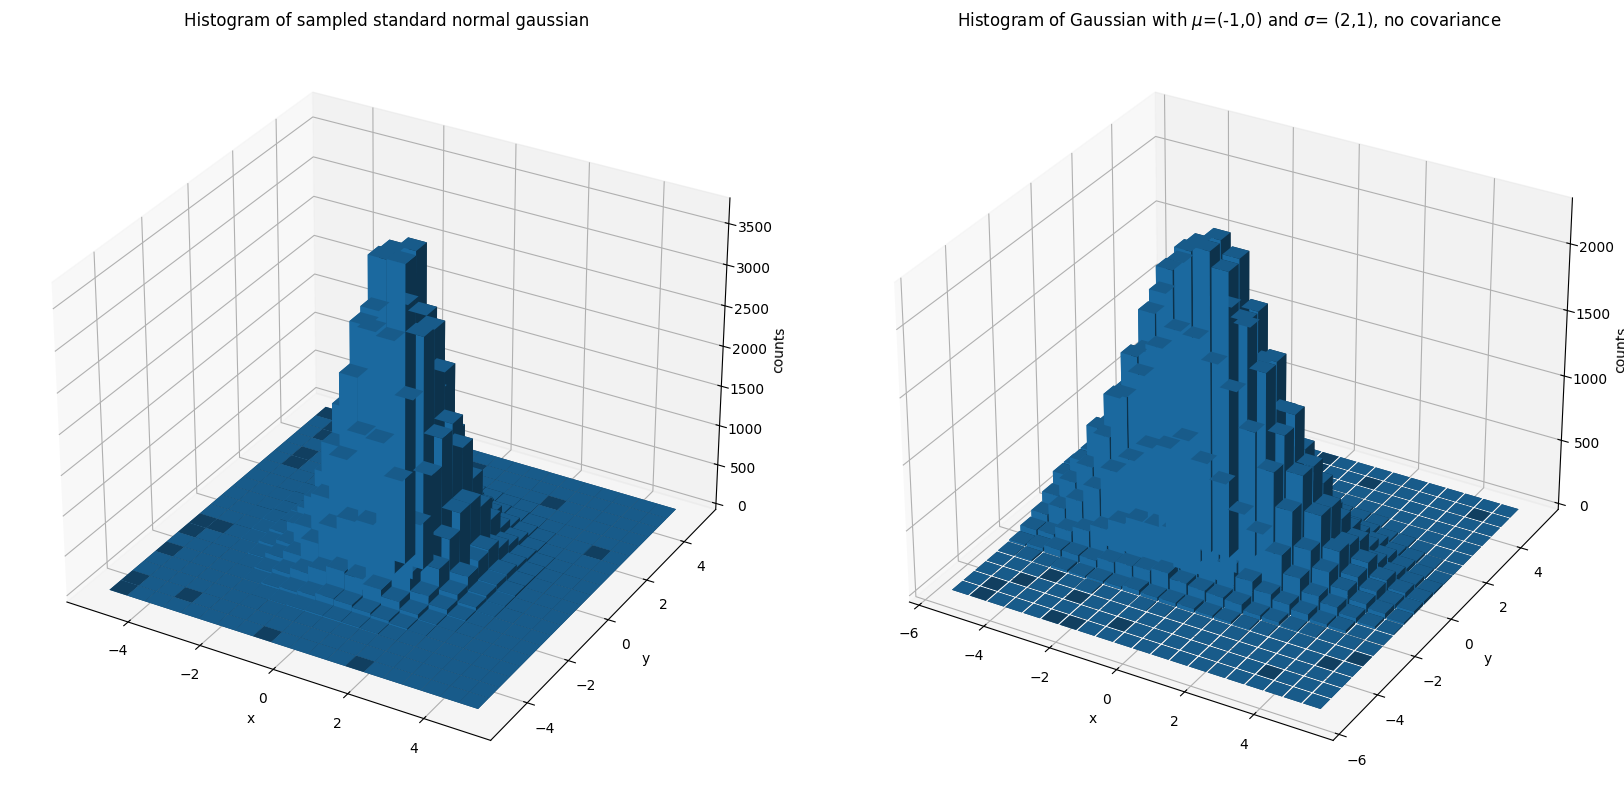

In [33]:
x= data3[6]
y=data3[7]
sig_x=2,
my_x=-1
sig_y=1
my_y=0

x_scaled=sig_x*x+my_x
y_scaled= sig_y*y+my_y

hist, xedges, yedges = np.histogram2d(x, y, bins=20, range=[[-5, 5], [-5,5]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0
# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

fig,axs= plt.subplots(1,2 ,figsize=(17,8),subplot_kw=dict(projection='3d'), tight_layout="True")


axs[0].bar3d(xpos, ypos, zpos, dx, dy, dz,)
axs[0].set_title("Histogram of sampled standard normal gaussian")
hist, xedges, yedges = np.histogram2d(x_scaled, y_scaled, bins=20, range=[[-5.5, 5.5], [-5.5,5.5]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0
# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()


axs[1].bar3d(xpos, ypos, zpos, dx, dy, dz,)

axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].set_zlabel("counts")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].set_zlabel("counts")

axs[1].set_title("Histogram of Gaussian with $\mu$=(-1,0) and $\sigma$= (2,1), no covariance")
plt.show()



#### 2.3 Rejection Method for Sampling from hard to invert functions

The goal of this exercise was to sample succesfully from the impossible to invert function $$f(x) = \sqrt{\frac{2}{\pi}} \ \text{exp(-x²)}$$. because this is not normalised on $[0,\infty]$, instead I aimed to sample from $$f(x) = \frac{2}{\sqrt{\pi}} \ \text{exp(-x²)}$$.

To achieve this, one can use the Rejection method, of sampling an $x_i $ according to a more accesible distribution $g(x)$ that closely resembles $f(x)$, drawing a random number $\xi$ from a uniform dist. on [0,1] and then rejecting all values $x_i$ where  $$ \xi >= \frac{f(x_i)}{c g(x_i)}$$


As instructed on the exercise sheet, I sampled from
\begin{equation}
g(x) \ = \ \begin{cases} A \text{\hspace{3cm}  if x} \leq p \\ \\ \frac{A} {p} \ x \; \text{exp(p²-x²)}\hspace{1cm}   \text{else} \end{cases}
\end{equation}
with the inversion method (see handwritten notes). Below I first plotted N=1000 values sampled from g(x) in a normalised histogram, and thus to make it clear if the sampling was succesful, also a normalised g(x). By hand, I found out that the right Z to normalise g(x) is  given by $Z= A/p + A/2p$. Below one can see that the sampling  from g(x) works very well.



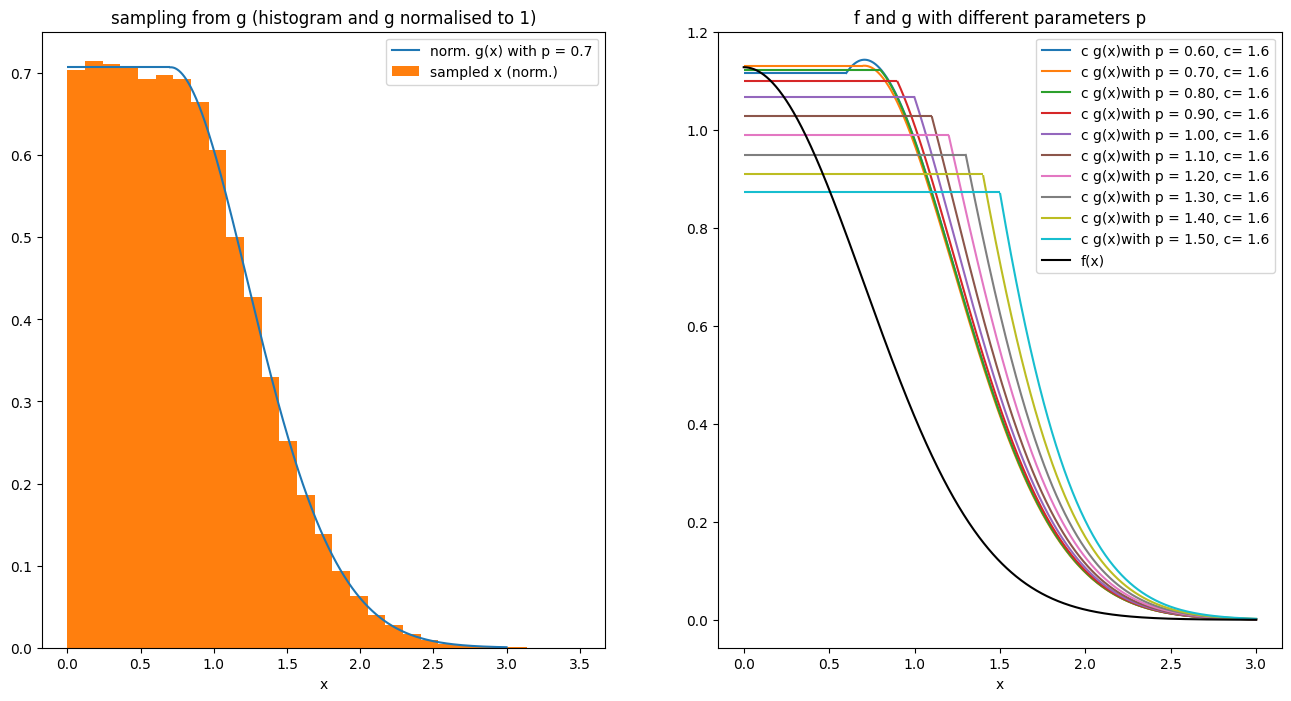

In [34]:
data3=[]
with open('data3.csv') as csvfile:
    contents = csv.reader(csvfile, delimiter=";")
    next(contents)
    for row in contents:
    
        data3.append(np.asarray(row).astype('float64'))
        
x=np.linspace(0,3,1000)
fig, axs= plt.subplots(1,2,figsize=(16,8))
p=0.7

def g(xs,p):
    vals=[]
    
    for x in xs:
        if (x<p):
            vals.append( p)
        else:
            vals.append(p*np.exp(-(x)))

    return np.array(vals)
N=100000
x2=x[x>=p]
A= 1/(p+1/(2*p))
axs[0].set_title("sampling from g (histogram and g normalised to 1)")
axs[0].set_xlabel("x")

axs[0].plot(x2, A/(p)*x2*np.exp(p**2-x2**2),label="norm. g(x) with p = %.1f"%(p))
axs[0].hlines(A,0,p)
axs[0].hist(data3[4],label="sampled x (norm.)", density="True" ,bins=np.linspace(0,3.5,30))
axs[0].legend()

c=1.6
axs[1].set_title("f and g with different parameters p")
ps=np.arange(0.6,1.6,0.1)
for pi in ps:
    x2=x[x>=pi]
    A= 1/(pi+1/(2*pi))*c
    plot=axs[1].plot(x2, A/pi*x2*np.exp(pi**2-x2**2),label="c g(x)with p = %.2f, c= 1.6"%(pi))
    axs[1].hlines(A,0,pi,color=plot[0].get_color())
axs[1].plot(x,2*np.sqrt(1/np.pi)*np.exp(-x**2), color="black",label= "f(x)")
axs[1].set_xlabel("x")
axs[1].legend()
plt.show()

The sampling works very well. on the left, I plottet f(x) in black, along with g(x) for different p. one can clearly see that, When $p =2/3$, the transition from the constant happens right where g(x) has its maximum, and most cosely resembles the function f(x). This is why this was chosen as the parameter in teh sampling, as having an even worse g would result in less efficient sampling. the constant $c$ used in the criterion should be close to 1, and  after trying different values.I chose $c = 1.6$ for p=0.7 by playing around with the parameters.

for smaller ps, g(x) is not maximal at x=0, so c would need to be massive to accurately sample the small x domain. for larger p , the maximum is in general quite low and extends further, and when multiplied by a factor c that is large enough to allow the maximal value of f(x) to be reproduced, the rejected area under the tail is much larger than for p=0.7 and c = 1.7.

In the cell below, the final result of the rejection sampling is plotted in a normalised histogram, along with a normalised f(x) (see handwritten notes). The rejection sampling works very well.



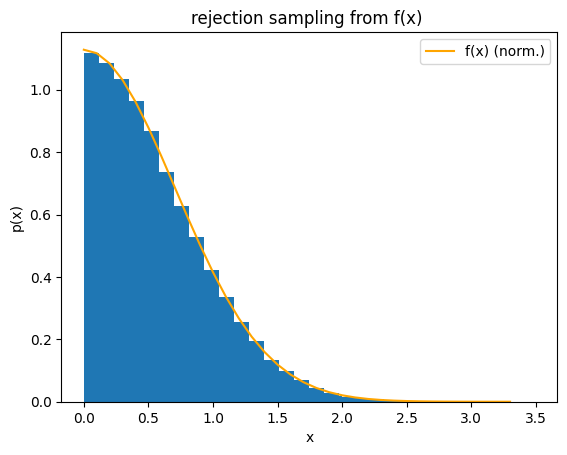

In [36]:
rejection_distr = data3[5]

plt.title("rejection sampling from f(x) ")
plt.title("rejection sampling from f(x) ")
#counts, edges=np.histogram(rejection_distr,bins=np.arange(0,3.5,0.1),weights=np.ones_like(rejection_distr)/100000/np.sqrt(2)/0.1)
x=np.arange(0,3.5,0.1)[:-1:]

plt.bar(x=np.arange(0,3.5,0.1)[:-1:],height=counts,width=0.1, align="edge")

plt.hist(rejection_distr, density="True", bins=30)
plt.xlabel("x")
plt.ylabel("p(x)")
plt.plot(x,2*np.sqrt(1/np.pi)*np.exp(-x**2),label= "f(x) (norm.)", color="orange")
plt.legend()
plt.show()